<a href="https://colab.research.google.com/github/PaulMRivera/Computational_physics/blob/master/Activity_7/Actividad7_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Bibliotecas para trabajar en Algebra Lineal
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt
%matplotlib inline

#ejercicio 6
import pandas as pd

**Ejercicio 1.** Defina las siguientes matrices.

\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
   \end{bmatrix}
\end{equation*}

\begin{equation*}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation*}

 y la matrix identidad 

 \begin{equation*}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation*}

Calcule el resultado de $2*I+3*A+A@B$.

Para definir la matriz identidad, se puede utilizar la función *np.eye(2, dtype=int)*. Ver manual de  [np.eye()](https://numpy.org/doc/stable/reference/generated/numpy.eye.html).

In [ ]:
A = np.array([[1,3],[-1,7]])
B = np.array([[5,2],[1,2]])
I = np.eye(2, dtype=int)
print(A)
print(B)
print(I)

[[ 1  3]
 [-1  7]]
[[5 2]
 [1 2]]
[[1 0]
 [0 1]]


In [ ]:
Act1 = 2*I + 3*A + A@B
print(Act1)

[[13 17]
 [-1 35]]


**Ejercicio 2**. Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación 
\begin{equation}
\det(M - \lambda I) = 0
\end{equation}
Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como
\begin{equation}
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
\end{equation}
y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

\begin{equation}
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
\end{equation}

[El Teorema de Cayley-Hamilton](https://en.wikipedia.org/wiki/Cayley–Hamilton_theorem) nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico
\begin{equation}
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
\end{equation}
y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$. 

Demuestre esto para cualquier matriz M (2x2),  ($\det(M) \neq 0$).

**Ejercicio 3:**

Resuelva el sistema de ecuaciones.

\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}

de dos formas, utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

In [ ]:
#Definimos 3 funciones 

#Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

In [ ]:
M = np.array([[1,-3,1,1],[3,-4,1,5],[0,2,-1,0]])
M = add_row(M,-3,1,0)
M = scale_row(M,1/5,1)
M = add_row(M,3,0,1)
M = add_row(M,-2,2,1)
M = scale_row(M,-5,2)
M = add_row(M,1/5,0,2)
M = add_row(M,2/5,1,2)

m = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
b = np.array([[1],[5],[0]])
r = la.solve(m, b)

print(M)
print(r)

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17  3.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -8.88178420e-17  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  4.00000000e+00]]
[[3.]
 [2.]
 [4.]]



Ejercicio 4:

Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre Eigenvalores y Eigenvectores)

$$\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_2 = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation*}$$$$\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 3 \\
\end{bmatrix}
\end{equation*}$$
Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de scipy.linalg.eig(), y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia.

In [ ]:
#m = np.array([[,,],[,,],[,,]])
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print(B1)
print(B2)
print(B3)

[[2 0 0]
 [0 3 4]
 [0 4 9]]
[[0 1 0]
 [0 0 1]
 [1 0 0]]
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [ ]:
# Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = la.eig(B1)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)
print("")
print("Los valores para los eigenvaolres en la pagina antes citada son: 2, 1, y 11")
print("Los valores para los eigenvectores en la pagina antes citada son: [1 0 0]T, [0 -2 1]T y [0 1 2]T")

Eigenvalores: [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores: [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]

Los valores para los eigenvaolres en la pagina antes citada son: 2, 1, y 11
Los valores para los eigenvectores en la pagina antes citada son: [1 0 0]T, [0 -2 1]T y [0 1 2]T


In [ ]:
eigvals, eigvecs = la.eig(B2)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)
print("")
print("Los valores para los eigenvaolres en la pagina antes citada son: 2, 1, y 11")
print("Los valores para los eigenvectores en la pagina antes citada son: [1 0 0]T, [0 -2 1]T y [0 1 2]T")

Eigenvalores: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores: [[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]

Los valores para los eigenvaolres en la pagina antes citada son: 2, 1, y 11
Los valores para los eigenvectores en la pagina antes citada son: [1 0 0]T, [0 -2 1]T y [0 1 2]T


In [ ]:
eigvals, eigvecs = la.eig(B3)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)
print("")
print("Los valores para los eigenvaolres en la pagina antes citada son: 2, 1, y 11")
print("Los valores para los eigenvectores en la pagina antes citada son: [1 0 0]T, [0 -2 1]T y [0 1 2]T")

Eigenvalores: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]

Los valores para los eigenvaolres en la pagina antes citada son: 2, 1, y 11
Los valores para los eigenvectores en la pagina antes citada son: [1 0 0]T, [0 -2 1]T y [0 1 2]T


**Ejercicio 5.**
Se tienen los siguientes 8 puntos: 

\begin{eqnarray*} 
(x&,&y) \\
(0.0 &,& 0.0), \\ 
(0.5 &,& 0.47942), \\ 
(1.0 &,& 0.84147), \\
(1.5 &,& 0.99749), \\
(2.0 &,& 0.90930), \\
(2.5 &,& 0.59847), \\
(3.0 &,& 0.14112), \\
(3.5 &,& -0.35078) \\
\end{eqnarray*}

Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos. 

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

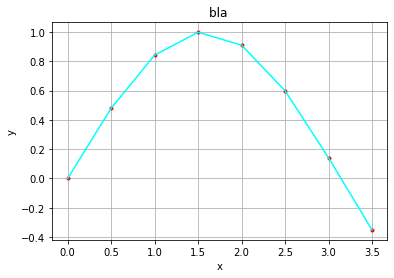

In [ ]:
x = 0,0.5,1,1.5,2.0,2.5,3,3.5
y = 0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078
z = np.sin(x) 
plt.plot(x,y,'r.')
plt.grid()
plt.title('bla ')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,z, color= "cyan")
plt.show()

In [ ]:
# La biblioteca Numpy tambien tiene una función para crear la matriz de Vandermonde
X = np.vander(x,increasing=True)
# Sólo imprimimos los primeros 5 renglones y columnas.
print(X[:5,:5])

[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]


In [ ]:
a = la.solve(X,y)
print(a)

[ 0.00000000e+00  1.00067181e+00 -3.70788889e-03 -1.58867889e-01
 -8.30222222e-03  1.31964444e-02 -1.54488889e-03  2.46349206e-05]


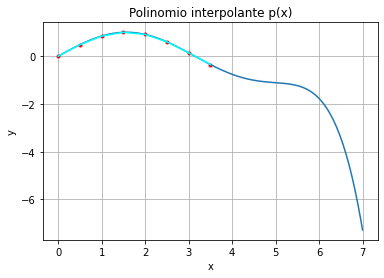

In [ ]:

N=8
# Graficamos el polinomio interpolante y los puntos interpolados
# Los puntos interpolados en rojo ('r.')
xs = np.linspace(0,N-1,200)
ys = sum([a[k]*xs**k for k in range(0,N)])
plt.plot(x,y,'r.',xs,ys)
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,z, color= "cyan")
plt.show()

**Ejercicio 6.** 
Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

**NOTA:** Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones. 

In [ ]:
#Tomar la dirección URL del archivo
url = 'https://smn.conagua.gob.mx/tools/RESOURCES/Diarios/26071.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Copia de respaldo
df_work0 = df_dist.copy()

#Cambiar los valores "Nulo" por un campo vacio
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

#Convertir los valores de las distintas variables a números flotantes flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

#Creacion dataframe en caso de regresarse
df_work2 = df_work1.copy()

#Cambio de formato para la columna Fecha a un formato de fecha que comprende Python
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

#Función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

#Creasion de nuestro punto de partida
df_meteo = df_work2.copy()

#Copia del último DataFrame df_meteo y crea un DataFrame df_meteo_ts
df_meteo_ts = df_meteo.copy()

#Reemplazo el índice por la variable 'Fecha' 
df_meteo_ts = df_meteo_ts.set_index('Fecha')

df_r = df_meteo_ts[(df_meteo_ts['Año'] >= 1984) & (df_meteo_ts['Año'] < 1985)]

In [ ]:
df_r

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1984-01-01,0.0,2.8,21.0,6.0,1984,Jan
1984-01-02,0.0,4.2,21.0,10.0,1984,Jan
1984-01-03,0.0,2.4,21.5,8.0,1984,Jan
1984-01-04,4.2,0.9,19.0,10.0,1984,Jan
1984-01-05,0.3,2.4,21.0,14.0,1984,Jan
...,...,...,...,...,...,...
1984-12-27,9.9,0.8,17.5,11.0,1984,Dec
1984-12-28,0.0,2.6,20.0,13.0,1984,Dec
1984-12-29,0.0,3.1,19.0,8.0,1984,Dec


In [ ]:
# Graficamos el resultado del ajuste

plt.plot(df_r[Fecha],df_r[Tmax],'r',linewidth=4)
plt.scatter(x,y,alpha=0.5,lw=0)
plt.grid()
plt.title('Ajuste mediante Regresión Cuadrática a los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

NameError: ignored